In [1]:
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.constants import c
from astropy.coordinates import Galactic

import numpy as np
import healpy as hp
import pandas as pd
import matplotlib.pyplot as plt
from healpy.projaxes import HistEqNorm

import projections
import mycmap

#Data from 

In [2]:
hdu = fits.open('map_data/Planck_galmask.fits')

In [3]:
hdu[1].data.dtype.names

('GAL020',
 'GAL040',
 'GAL060',
 'GAL070',
 'GAL080',
 'GAL090',
 'GAL097',
 'GAL099')

In [4]:
galmask_20 = hp.fitsfunc.read_map('map_data/Planck_galmask.fits',field=0,hdu=1)
galmask_40 = hp.fitsfunc.read_map('map_data/Planck_galmask.fits',field=1,hdu=1)
galmask_60 = hp.fitsfunc.read_map('map_data/Planck_galmask.fits',field=2,hdu=1)
galmask_70 = hp.fitsfunc.read_map('map_data/Planck_galmask.fits',field=3,hdu=1)
galmask_80 = hp.fitsfunc.read_map('map_data/Planck_galmask.fits',field=4,hdu=1)
galmask_90 = hp.fitsfunc.read_map('map_data/Planck_galmask.fits',field=5,hdu=1)
galmask_97 = hp.fitsfunc.read_map('map_data/Planck_galmask.fits',field=6,hdu=1)
galmask_99 = hp.fitsfunc.read_map('map_data/Planck_galmask.fits',field=7,hdu=1)

In [5]:
#def maskedge(m,size,cmap=plt.get_cmap('jet'),norm='hist',coord=["G"]):
def maskedge(img):
    #img = hp.orthview(m,
    #                  cmap=cmap,
    #                  norm=norm,
    #                 coord=coord,
    #                 xsize=2*size,
    #                 return_projected_map=True)
    
    size = img.shape[0]
    image = HistEqNorm(vmin=0,vmax=1)(np.copy(img))
    image = np.array(np.rint(10*image)/10)
    image[image==0] = np.nan
    image[image==1] = np.nan
    image[image==-np.inf] = np.nan
    image[~np.isnan(image)] = 1
    return image

0
1
2
3
4
5
6
7


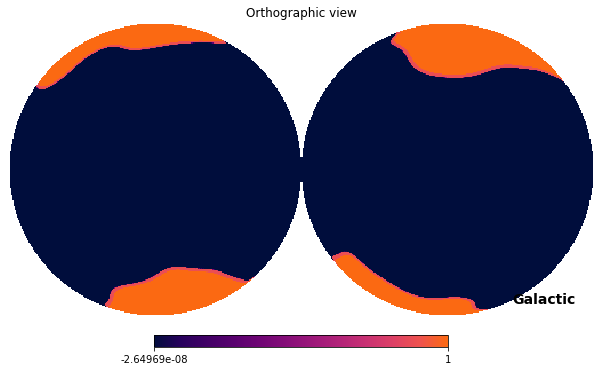

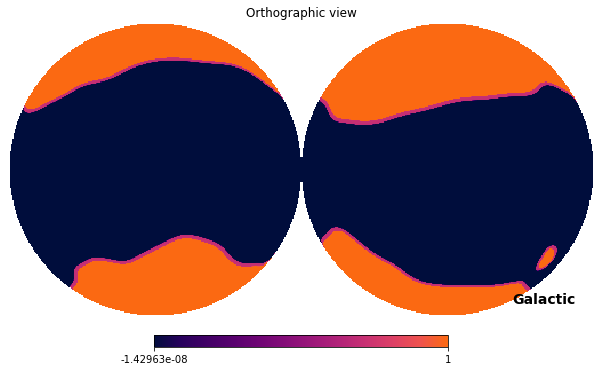

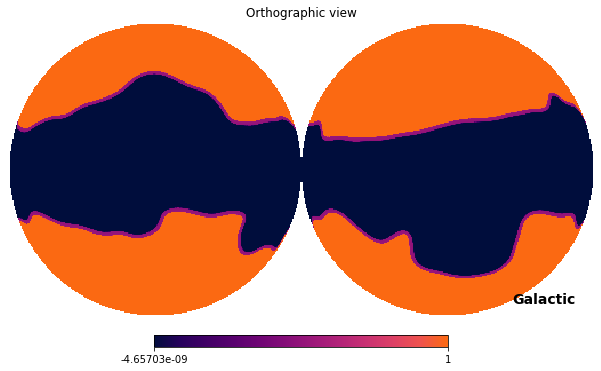

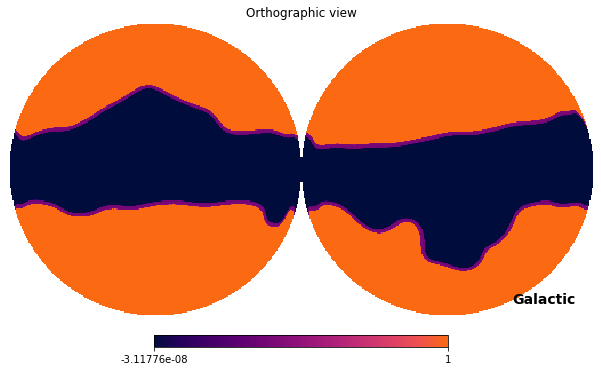

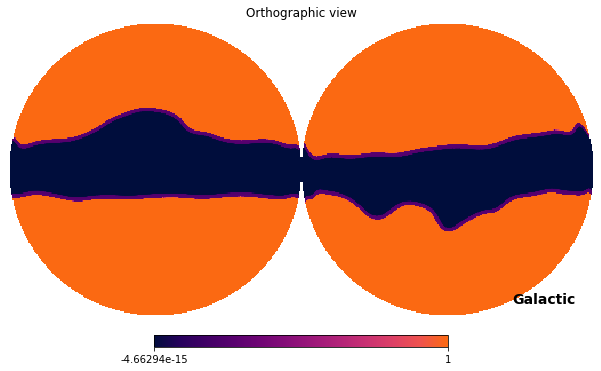

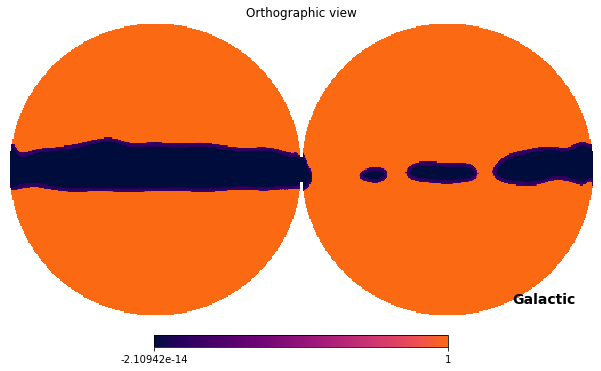

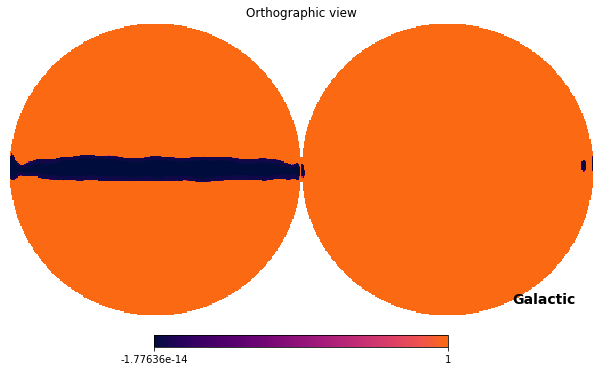

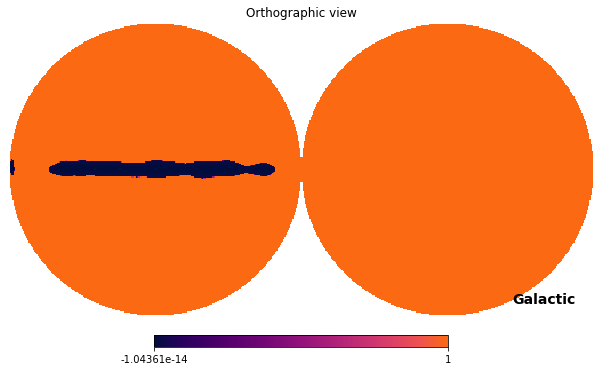

In [6]:
maps = [galmask_20,
        galmask_40,
        galmask_60,
        galmask_70,
        galmask_80,
        galmask_90,
        galmask_97,
        galmask_99]

imlist = []
imgsize = 256

for i,m in enumerate(maps):
    img=hp.orthview(hp.smoothing(hp.ud_grade(m,1024),0.5*np.pi/180),
                    cmap=mycmap.cmb,
                    norm='hist',
                    coord=["G"],
                    xsize=2*imgsize,
                    return_projected_map=True)
    imlist.append(img)
    print(i)

In [13]:
#sum_arr = np.zeros(imlist[0].shape)
#
#for i,img in enumerate(imlist):
#    outline = maskedge(img)
#    outline[np.isnan(outline)] = 0
#    sum_arr += outline

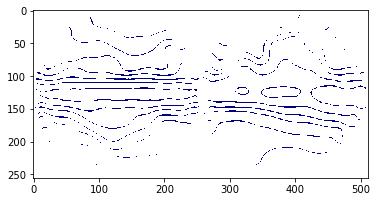

In [22]:
#sum_arr2 = np.copy(sum_arr)
#sum_arr2[sum_arr==0] = np.nan
#_=plt.imsave('allcontours.png',sum_arr2,cmap='jet',format='png')
##_=plt.imshow(sum_arr2,cmap='jet')

In [15]:
#arr1 = np.zeros(4)
#arr2 = np.array([True,True,0,0])
#np.logical_or(arr1,arr2)

array([ True,  True, False, False])

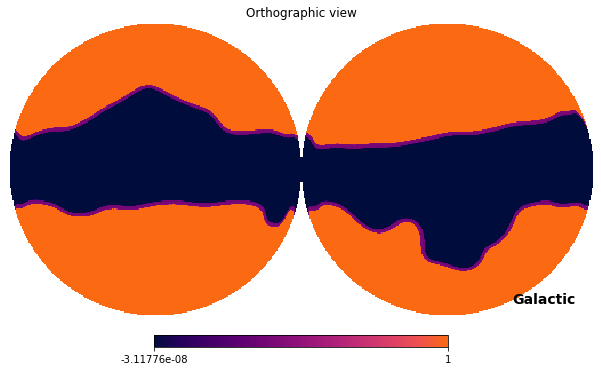

In [17]:
#img=hp.orthview(hp.smoothing(hp.ud_grade(galmask_70,1024),0.5*np.pi/180),
#                cmap=mycmap.cmb,
#                norm='hist',
#                coord=["G"],
#                xsize=512,
#                return_projected_map=True)

In [7]:
contour_list = [20,40,60,70,80,90,97,99]
for i,img in enumerate(imlist):
    size = img.shape[0]
    img_stripped = HistEqNorm(vmin=0,vmax=1)(np.copy(img)[:,:size])
    img_stripped = np.array(np.rint(10*img_stripped)/10)
    img_stripped[img_stripped==0] = np.nan
    img_stripped[img_stripped==1] = np.nan
    img_stripped[img_stripped==-np.inf] = np.nan
    img_stripped[~np.isnan(img_stripped)] = 1
    
    _=plt.imsave('outlinetest_{:d}.png'.format(contour_list[i]),
                 plt.get_cmap('Greys_r')(img_stripped),
                 format='png',
                 origin='lower')

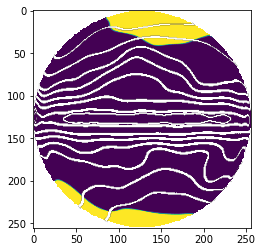

In [18]:
#import matplotlib.image as image
_=plt.imshow(imlist[0])
c20 = plt.imread('outlinetest_20.png')
c40 = plt.imread('outlinetest_40.png')
c60 = plt.imread('outlinetest_60.png')
c70 = plt.imread('outlinetest_70.png')
c80 = plt.imread('outlinetest_80.png')
c90 = plt.imread('outlinetest_90.png')
c97 = plt.imread('outlinetest_97.png')
c99 = plt.imread('outlinetest_99.png')
_=plt.imshow(c20)
_=plt.imshow(c40)
_=plt.imshow(c60)
_=plt.imshow(c70)
_=plt.imshow(c80)
_=plt.imshow(c90)
_=plt.imshow(c97)
_=plt.imshow(c99)

<ipython-input-19-a1ee35d5e1ba>:4: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sqsum)


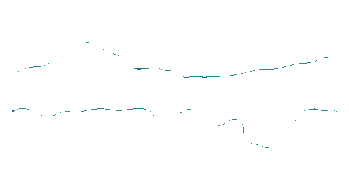

In [19]:
from scipy import ndimage
def gradmag(arr):
    sqsum = np.gradient(arr)[0]**2 + np.gradient(arr)[1]**2
    return np.sqrt(sqsum)

outlines = gradmag(img)
outlines = np.rint(10*outlines)/10
outlines[outlines==0] = np.nan
#outlines[outlines==1] = np.nan
#outlines[outlines==-np.inf] = np.nan
#outlines[np.logical_and(outlines>0,outlines<1)] = 1

outlines_smooth = ndimage.gaussian_filter(outlines[:,:size], sigma=(10,10), order=0)
_=plt.imshow(outlines,origin='lower')
_=plt.axis("off")

In [ ]:
np.unique(outlines)